# Lab 9: Factors, dates and times




In [ ]:
install.packages("nycflights13")

library(tidyverse)
library(nycflights13)
library(lubridate)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


## Factors basics

Throughout this course we have encountered factor variables, but have yet to explore what a `factor` is in R. Factors are used to process cateogrical data in R. At a surface level, they look like character variables but have additional proporties that provide convenience when peforming data analysis.

In this section of the lab we will cover how to construct and modify factors.

### Creating factors

Imagine that we have the the following responses to a particular question in a student evaluation:

In [ ]:
response = c("Agree", "Agree", "Strongly Agree", "Disagree", "Agree")

In [ ]:
response
class(response)

[1] "Agree"          "Agree"          "Strongly Agree" "Disagree"      
[5] "Agree"

[1] "character"

Currently, `response` is a character vector. Certain operations in R may not interact with this object the way we would like given our interpretation of the values. For example, sorting the vector orders it alphabetically though we may want to sort it according to the degree the student agrees with the statment.

In [ ]:
sort(response)

[1] "Agree"          "Agree"          "Agree"          "Disagree"      
[5] "Strongly Agree"

Using `factor`, we can add additional structure to the object that better matches our understanding of the variable's values.

In [ ]:
response_levels  <- c("Strongly Disagree", "Disagree", "Neutral", "Agree", "Strongly Agree")
response_fct  <- factor(response, levels = response_levels)

Now, when we sort `response_fct`, it is according to the strength of the statement.

In [ ]:
sort(response_fct)

[1] Disagree       Agree          Agree          Agree          Strongly Agree
Levels: Strongly Disagree Disagree Neutral Agree Strongly Agree

Note that how that values are sorted depends on the order of how the levels appear when inputed to `factor`.

In [ ]:
response_levels  <- c("Strongly Agree", "Disagree", "Neutral", "Agree", "Strongly Disagree")
response_fct  <- factor(response, levels = response_levels)
sort(response_fct)

[1] Strongly Agree Disagree       Agree          Agree          Agree         
Levels: Strongly Agree Disagree Neutral Agree Strongly Disagree

This added structure will be useful when analyzing and visualizing categorical data that matches our intuition for the data.

### A deeper look at factors

Below, we create a variable that represents the decades 1980-2010.

In [ ]:
decades   <- c(1980, 1990, 2000, 2010)
class(decades)

[1] "numeric"

We now create a new factor variable based on the numeric `decades` variable and then observe what happens when we
try to convert it back to a numeric variable.

In [ ]:
decades_fct <- factor(decades)
decades_2  <- as.numeric(decades_fct)


decades
decades_fct
decades_2

[1] 1980 1990 2000 2010

[1] 1980 1990 2000 2010
Levels: 1980 1990 2000 2010

[1] 1 2 3 4

Using `as.numeric` does not return the original numeric data. Rather, we see that 1980 is mapped to 1, 1990 is mapped to 2, and so on. Then 1, 2, 3, and 4 are each associated with the `levels`  '1980', '1990', '2000', and '2010'.

Using the function `levels`, we can access the levels of a factor variable. Note that this returns a character variable.

In [ ]:
levels(decades_fct)
class(levels(decades_fct))

[1] "1980" "1990" "2000" "2010"

[1] "character"

##  Factor Basics Exercises

1. If `x = c(1, 2, 3, 3, 5, 3, 2, 4, NA)`, what are the levels of `factor(x)`?


2. If `z <- factor(c("p", "q", "p", "r", "q"))` and levels of z are "p", "q" ,"r", write an R expression that will change the level "p" to "w" so that z is equal to: "w", "q" , "w", "r" , "q".

3. Let `df <- data.frame(q=c(2, 4, 6), p=c("a", "b", "c"))`. Write an R statement that replaces levels "a", "b", "c" with labels "fertiliser1", "fertliser2", "fertiliser3".  

_Hint_ : There is an additional argument to `factor` that lets you modify the labels of a factor variable.

In [ ]:
### YOUR CODE HERE (Question 1)

x = c(1, 2, 3, 3, 5, 3, 2, 4, NA)

In [ ]:
### YOUR CODE HERE (Question 2)

z <- factor(c("p", "q", "p", "r", "q"))
levels(z)

[1] "p" "q" "r"

In [ ]:
### YOUR CODE HERE (Question 3)

df <- data.frame(q = c(2, 4, 6), p = c("a", "b", "c"))

In exercise 1 we saw that `NA` was treated as a level. This might not be that behavior that we want. Using `fct` from `forcats` we can catch this behavior. Notice how `fct` will treat the `NA` as an error rather than another level of the factor variable.

In [ ]:
fct(x)

ERROR: ignored

Similary, if a character variable has values not in the specificied levels, `factor` will convert it to `NA`. Again, if we want to catch this we can use `fct`.

In [ ]:
response = c("Agree", "Agree", "Strongly Agree", "Disagre", "Agree")
factor(response, levels = response_levels)
fct(response, levels = response_levels)

[1] Agree          Agree          Strongly Agree <NA>           Agree         
Levels: Strongly Agree Disagree Neutral Agree Strongly Disagree

ERROR: ignored

`forcats` (an anagram of factor) is a tidyverse package that provides a wide range of functions for working with factors. The rest of this section will explore using these functions to handle factor variables.

### Modifying factor order

Going forward we will use `forcats::gss_cat`, a sample of data from the General Social Survey, a long-running US survey conducted by the independent research organization NORC at the University of Chicago.

In [ ]:
head(gss_cat)

year,marital,age,race,rincome,partyid,relig,denom,tvhours
<int>,<fct>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>
2000,Never married,26,White,$8000 to 9999,"Ind,near rep",Protestant,Southern baptist,12
2000,Divorced,48,White,$8000 to 9999,Not str republican,Protestant,Baptist-dk which,NA
2000,Widowed,67,White,Not applicable,Independent,Protestant,No denomination,2
2000,Never married,39,White,Not applicable,"Ind,near rep",Orthodox-christian,Not applicable,4
2000,Divorced,25,White,Not applicable,Not str democrat,None,Not applicable,1
2000,Married,25,White,$20000 - 24999,Strong democrat,Protestant,Southern baptist,NA


As we have seen in previous homeworks and labs, we often need to adjust the order of our categorical variable to clearly demonstrate a trend in the plot.

Below we look at the average age for each religion:

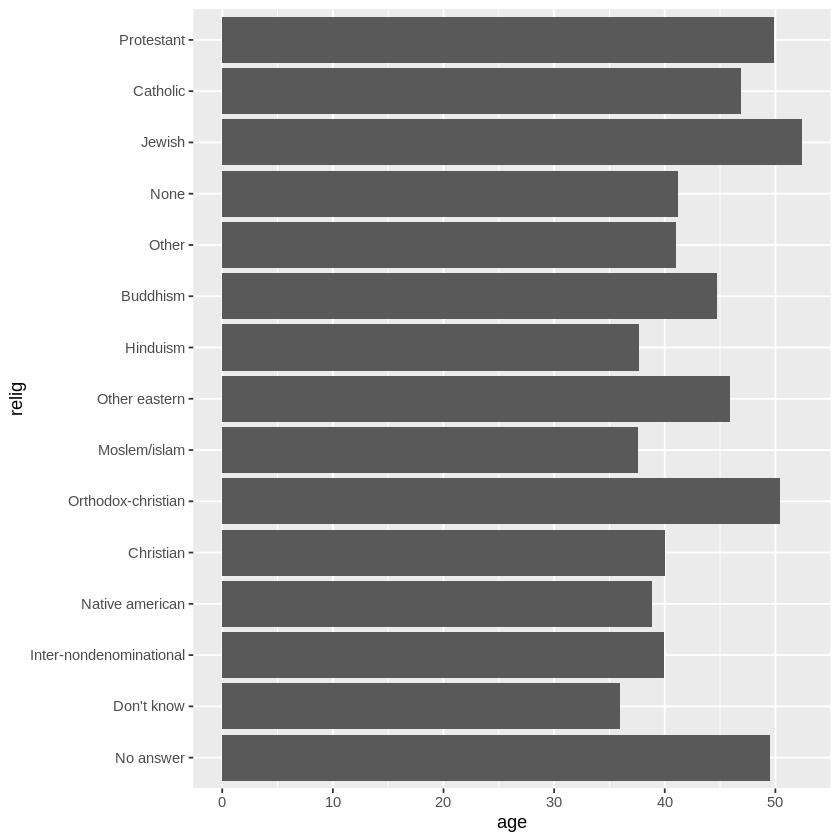

In [ ]:
gss_cat %>%
    group_by(relig) %>%
    summarise(age  = mean(age, na.rm = T)) %>%
    ggplot(aes(x = relig, y = age)) +
    geom_bar(stat = "identity") + coord_flip()

For visualization purposes it is nicer to have the bars in our plot ordered by their height. The function `fct_reoder` allows us to do this. `fct_reorder()` takes three arguments:

- `f`, the factor whose levels you want to modify.
- `x`, a numeric vector that you want to use to reorder the levels.
- Optionally, `fun`, a function that’s used if there are multiple values of `x` for each value of `f`.

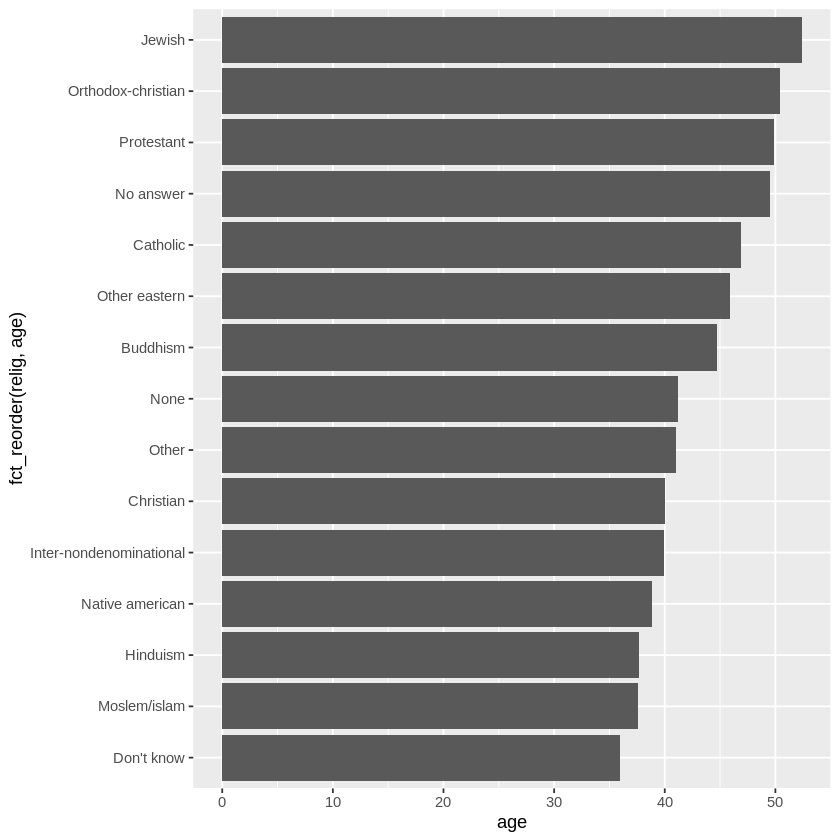

In [ ]:
gss_cat %>%
    group_by(relig) %>%
    summarise(age  = mean(age, na.rm = T)) %>%
    ggplot(aes(x = fct_reorder(relig, age), y = age)) +
    geom_bar(stat = "identity") + coord_flip()

Warning message:
“`fct_reorder()` removing 76 missing values.
ℹ Use `.na_rm = TRUE` to silence this message.
ℹ Use `.na_rm = FALSE` to preserve NAs.”
Warning message:
“`fct_reorder()` removing 76 missing values.
ℹ Use `.na_rm = TRUE` to silence this message.
ℹ Use `.na_rm = FALSE` to preserve NAs.”
Warning message:
“Removed 76 rows containing non-finite values (`stat_boxplot()`).”


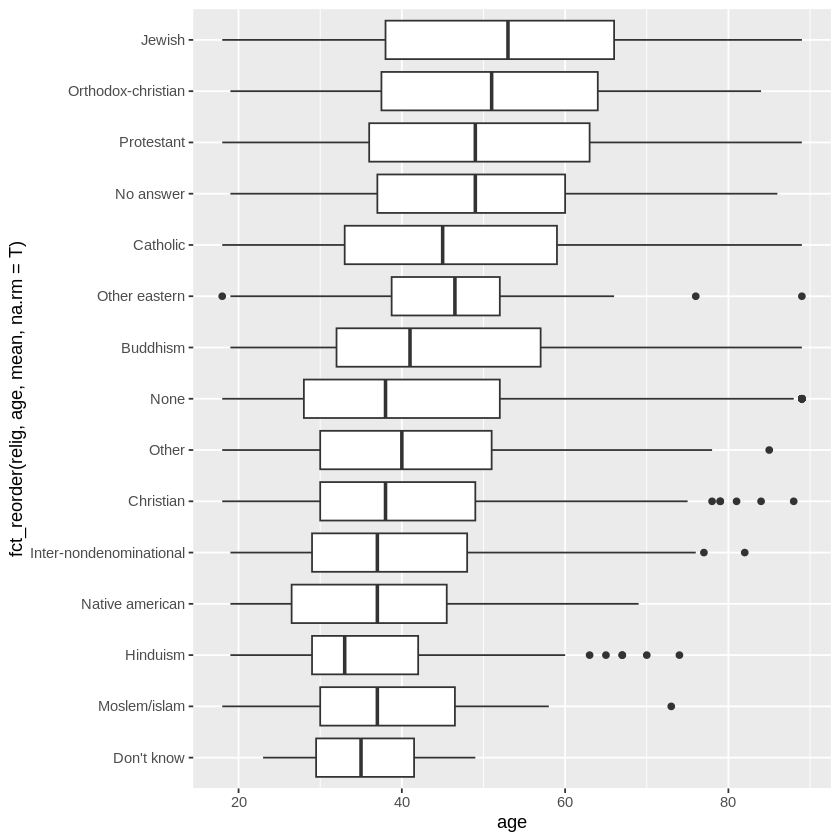

In [ ]:
gss_cat %>%
    ggplot(aes(x = fct_reorder(relig, age, mean, na.rm = T), y = age)) +
    geom_boxplot() + coord_flip()

Note that the default function used in `fct_reorder` is median.

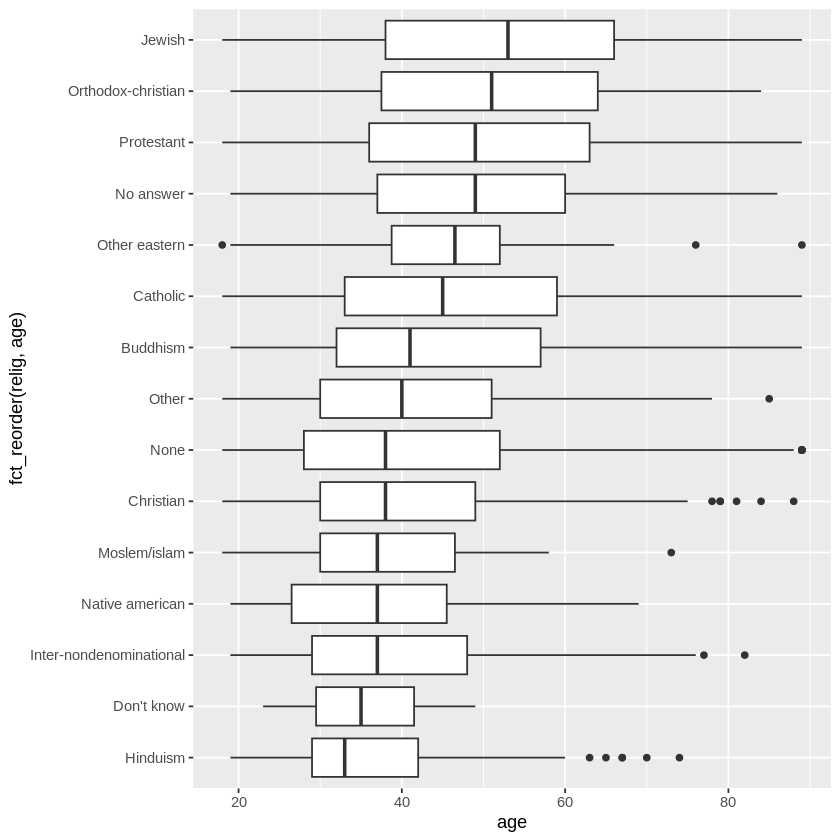

In [ ]:
gss_cat %>%
    filter(!is.na(age)) %>% # we need to filter out NAs for fct_reorder to work as intended
    ggplot(aes(x = fct_reorder(relig, age), y = age)) +
    geom_boxplot() + coord_flip()

### Modifying factor levels

Often when working categorical data, the levels are not initially in a clean and presentable form. The most common way to alter factor levels is using `fct_recode`, which allows us to change the value of each level to our liking.

In [ ]:
gss_cat %>%
  mutate(
    partyid = fct_recode(partyid,
      "Republican, strong"    = "Strong republican",
      "Republican, weak"      = "Not str republican",
      "Independent, near rep" = "Ind,near rep",
      "Independent, near dem" = "Ind,near dem",
      "Democrat, weak"        = "Not str democrat",
      "Democrat, strong"      = "Strong democrat"
    )
  ) %>%
  count(partyid)

partyid,n
<fct>,<int>
No answer,154
Don't know,1
Other party,393
"Republican, strong",2314
"Republican, weak",3032
"Independent, near rep",1791
Independent,4119
"Independent, near dem",2499
"Democrat, weak",3690


We can use `fct_collapse` to aggergate levels of a factor variable into broader categories.

In [ ]:
gss_cat %>%
  mutate(
    partyid = fct_collapse(partyid,
      "other" = c("No answer", "Don't know", "Other party"),
      "rep" = c("Strong republican", "Not str republican"),
      "ind" = c("Ind,near rep", "Independent", "Ind,near dem"),
      "dem" = c("Not str democrat", "Strong democrat")
    )
  ) %>%
  count(partyid)

partyid,n
<fct>,<int>
other,548
rep,5346
ind,8409
dem,7180


The `fct_lump_*()` functions allow us to keep the most frequent categories and aggregate the smaller categories into "Other".

In [ ]:
gss_cat %>%
  mutate(relig = fct_lump_lowfreq(relig)) %>%
  count(relig)

relig,n
<fct>,<int>
Protestant,10846
Other,10637


In [ ]:
gss_cat %>%
  mutate(relig = fct_lump_n(relig, n = 5)) %>%
  count(relig, sort = TRUE)

relig,n
<fct>,<int>
Protestant,10846
Catholic,5124
None,3523
Other,913
Christian,689
Jewish,388


## Factor Exercises

1.) Create a categorical variable of the following age brackets: 18-30, 30-40, 40-50, 50-65, 65 + and make a bar plot of the mean `tvhours` across age groups in increasing order.

In [ ]:
### YOUR CODE HERE

gss_cat %>% filter(!is.na(age)) %>% summarize(max(age))

max(age)
<int>
89


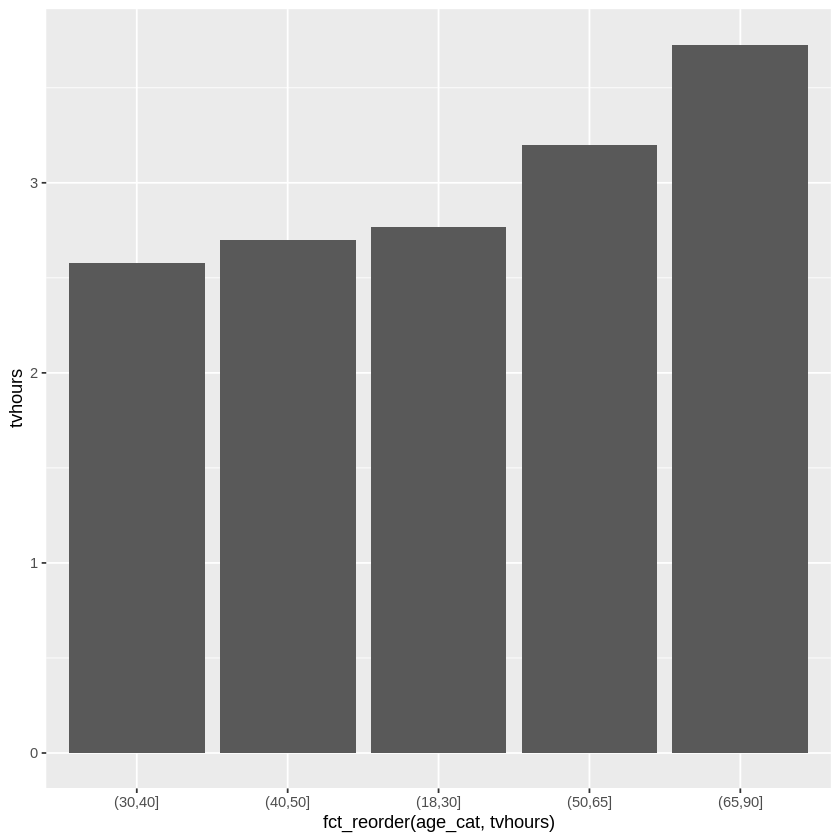

In [ ]:
### YOUR ANSWER SHOULD LOOK LIKE THIS

2.) Change `rincome` to only have the levels "\$20000 or more", "\$10000 - 19999", "\$5000 to 9999", "0 to 4999", and "Unknown". Print the number of observations for each `rincome` level.

In [ ]:
### YOUR CODE HERE


In [ ]:
### YOUR ANSWER SHOULD LOOK LIKE THIS

rincome,n
<fct>,<int>
Unknown,8468
$20000 or more,8646
$10000 - 19999,2216
$5000 to 9999,970
0 to 4999,1183


## Dates and times


Now, we turn our attention to working with dates and times in R. For this portion of the lab we will focus on the `lubridate` package.

### Creating date/times

There are three types of date/time data that refer to an instance in time:

- A **date**. Tibbles print this as `<date>`.
- A **time**. Tibbles print this as `<time>`.
- A **date-time** is a date plus a time: it uniquely identifies an instant in time (typically to the nearest second). Tibbles print this as `<dttm>`. Base R calls these POSIXct.

We will focus on dates and date-times.


The first thing to know about working with date-times in R (and other langauges) are date-time formats. These are standard across many programming languages and decribe a date component using a `%` followed by a single character.

While there are many date-time format components there are only a few that are truly necessary to know as described in this table:

| Type   | Code |Meaning         |Example|
|------  |------|-----           |-----|
|   Year | %Y   |4 digit year    |2021|
|        | %y   |2 digit year    |21|
|   Month | %m   |number    |2|
|    | %b   |Abbreviated name     |Feb|
|    | %B   |Full name     |Februrary|
| Day   | %d  |Two digits   |02|
|    | %e  |One or two digits   |2|
|  Time  | %H  | 24-hour hour  |13|
|    | %M | Minutes  |35|
|    | %S | Seconds |45|




For example, %Y-%m-%d specifies a date that’s a year, -, month (as number) -, day such as `2023-02-13`.

`lubridate` provides functions that automatically detect these formats so we typically do not need to specify them directly. One scenario where you might need to manually specify the date-time format is when reading data into R,
as shown in the toy exmaple below.


In [ ]:
csv <- "
  date
  01/02/15
"

read_csv(csv, col_types = cols(date = col_date("%m/%d/%y")))

date
<date>
2015-01-02


We must be careful as there are multiple ways we could interpret this date value depending on how we specify the format:

In [ ]:
read_csv(csv, col_types = cols(date = col_date("%d/%m/%y")))
read_csv(csv, col_types = cols(date = col_date("%y/%m/%d")))

date
<date>
2015-02-01


date
<date>
2001-02-15


We typically generate date-time variables from strings. The package `lubridate` provides a convenient set of functions that automatically determine the date-time formats. To use the lubridate functions identify the date the order at which year, month, and day appear in the date and then arrange "y", "m", and "d" in the same order. The sequence of "y", "m", and "d" gives the name of the function.

See the example below. Note that the specific format is not important as long as we know the date components come in the order year, month, day.

In [ ]:
ymd("2020-01-31")
ymd("2020/01/31")
ymd("20200131")

[1] "2020-01-31"

[1] "2020-01-31"

[1] "2020-01-31"

Below we see some examples with different orders of the date components and different date formats.

In [ ]:
mdy("January 31st, 2017")
dmy("31-Jan-2017")

[1] "2017-01-31"

[1] "2017-01-31"

To work with date-time variables we simply add an underscore to the above functions with one or more of "h", "m", "s" depending on whether hours, minutes, or seconds appear in the date.

In [ ]:
ymd_hms("2017-01-31 20:11:59")

[1] "2017-01-31 20:11:59 UTC"

`lubridate` also provides functions for "rounding" dates.

In [ ]:
floor_date(ymd_hms("2017-01-31 20:11:59"), "minute")
floor_date(ymd_hms("2017-01-31 20:11:59"), "hour")
floor_date(ymd_hms("2017-01-31 20:11:59"), "day")
floor_date(ymd_hms("2017-01-31 20:11:59"), "month")
floor_date(ymd_hms("2017-01-31 20:11:59"), "year")

[1] "2017-01-31 20:11:00 UTC"

[1] "2017-01-31 20:00:00 UTC"

[1] "2017-01-31 UTC"

[1] "2017-01-01 UTC"

[1] "2017-01-01 UTC"

We can also build date variables from inidividual date components.

In [ ]:
make_datetime(2013, 3, 13, 10, 30)

[1] "2013-03-13 10:30:00 UTC"

If need we can specify the timezone (this goes for other `lubridate` functions that build date-time variables).

In [ ]:
make_datetime(2013, 3, 13, 10, 30, tz = "EST")

[1] "2013-03-13 10:30:00 EST"

Let's look at an example fo creating date-time variables using the flights dataset from `nycflights13`.

Here we have numeric variables that represent the year, month, day, hour, and minute of the flight.

In [ ]:
flights %>% select(year, month, day, hour, minute, sched_dep_time) %>% head()

year,month,day,hour,minute,sched_dep_time
<int>,<int>,<int>,<dbl>,<dbl>,<int>
2013,1,1,5,15,515
2013,1,1,5,29,529
2013,1,1,5,40,540
2013,1,1,5,45,545
2013,1,1,6,0,600
2013,1,1,5,58,558


In [ ]:
flights %>%
    select(year, month, day, hour, minute, time_hour) %>%
    mutate(departure = make_datetime(year, month, day, hour, minute)) %>% head()

year,month,day,hour,minute,time_hour,departure
<int>,<int>,<int>,<dbl>,<dbl>,<dttm>,<dttm>
2013,1,1,5,15,2013-01-01 05:00:00,2013-01-01 05:15:00
2013,1,1,5,29,2013-01-01 05:00:00,2013-01-01 05:29:00
2013,1,1,5,40,2013-01-01 05:00:00,2013-01-01 05:40:00
2013,1,1,5,45,2013-01-01 05:00:00,2013-01-01 05:45:00
2013,1,1,6,0,2013-01-01 06:00:00,2013-01-01 06:00:00
2013,1,1,5,58,2013-01-01 05:00:00,2013-01-01 05:58:00


We can also easily plot date-times with `ggplot`. Note for histograms the unit for binwidth is seconds so in following plot a bindwith of 600 represents 10 minutes.

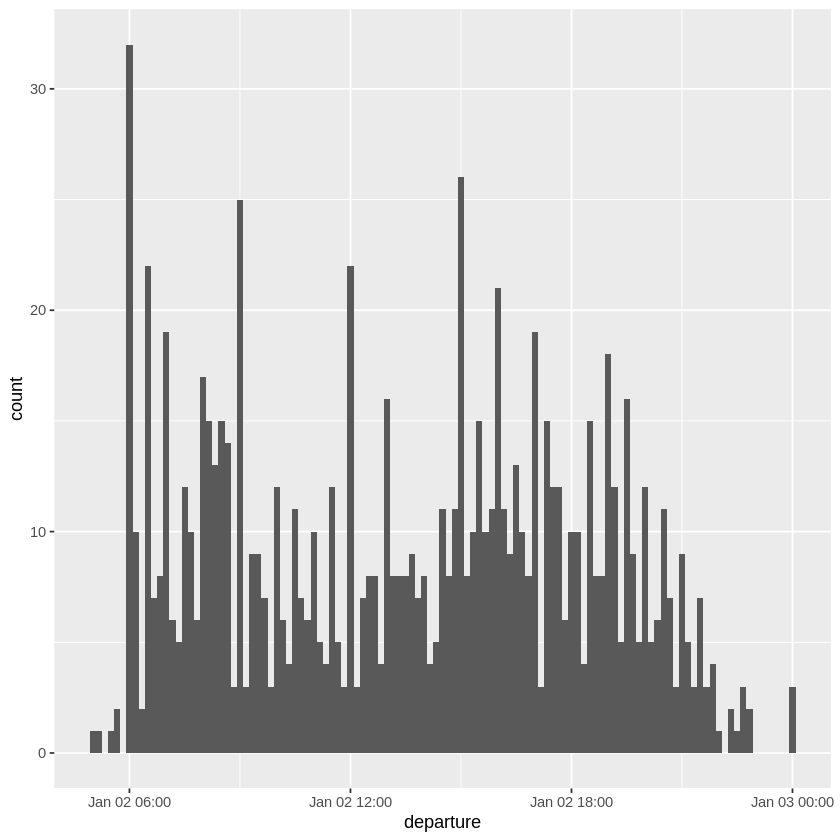

In [ ]:
flights %>%
    select(year, month, day, hour, minute, time_hour) %>%
    mutate(departure = make_datetime(year, month, day, hour, minute)) %>%
    filter(day == 2, month == 1) %>%
    ggplot(aes(x = departure)) +
    geom_histogram(binwidth = 600) # 600 s = 10 minutes

### UnixEpoch

Sometimes dates/times are reperesented as numeric increments from the "UnixEpoch" 1970-01-01. This means that numeric values are interpreted either as seconds or days since 1970-01-01. If we interpret the numeric value as days we can use `as_date` to get a date variable, otherwise use `as_datetime` to get a date-time variable.

In [ ]:
as_date(365)

[1] "1971-01-01"

In [ ]:
as_datetime(60)

[1] "1970-01-01 00:01:00 UTC"

### Getting components

Sometimes we start with a date-time variable and want to work with specific date-time components. `lubridate` also provides packages for obtaining these components.

In [ ]:
datetime <- ymd_hms("2026-07-08 12:34:56")


year(datetime)
month(datetime)
mday(datetime)
yday(datetime)
wday(datetime)

[1] 2026

[1] 7

[1] 8

[1] 189

[1] 4

We have the option of extracting date components as a `factor` variable.

In [ ]:
month(datetime, label = TRUE)
wday(datetime, label = TRUE, abbr = FALSE)

[1] Jul
12 Levels: Jan < Feb < Mar < Apr < May < Jun < Jul < Aug < Sep < ... < Dec

[1] Wednesday
7 Levels: Sunday < Monday < Tuesday < Wednesday < Thursday < ... < Saturday

Using these functions we can also modify datetimes in the following manner:

In [ ]:
datetime

year(datetime) <- 2030
month(datetime) <- 01


hour(datetime) <- hour(datetime) + 1

datetime

[1] "2026-07-08 12:34:56 UTC"

[1] "2030-01-08 13:34:56 UTC"

###  Time Spans

We may also want to do arithmetic with date-time variables. This results in three classes of time spans:

- **Durations**, which represent an exact number of seconds.
- **Periods**, which represent human units like weeks and months.
- **Intervals**, which represent a starting and ending point.

Subtracting two date-times yields a difftime class object which records a time span of seconds, minutes, hours, days, or weeks.

In [ ]:
days_in_23 = today() - ymd("2023-01-01")
days_in_23

Time difference of 295 days

`lubridate` uses **duration** which always uses seconds to maintain consistency.

In [ ]:
as.duration(days_in_23)

[1] "25488000s (~42.14 weeks)"

The are a number of functions that help us work with durations:

In [ ]:
dminutes(1)
ddays(0:5)

dhours(10) + ddays(1:3)

[1] "60s (~1 minutes)"

[1] "0s"                "86400s (~1 days)"  "172800s (~2 days)"
[4] "259200s (~3 days)" "345600s (~4 days)" "432000s (~5 days)"

[1] "122400s (~1.42 days)" "208800s (~2.42 days)" "295200s (~3.42 days)"

These functions allow us to conveniently do arithmetic with date-times

In [ ]:
ymd_hms("2026-07-08 12:34:56") + dhours(2)

ymd_hms("2026-07-08 12:34:56") - dweeks(2)

ymd_hms("2026-07-08 12:34:56") - ddays(1:3)

[1] "2026-07-08 14:34:56 UTC"

[1] "2026-06-24 12:34:56 UTC"

[1] "2026-07-07 12:34:56 UTC" "2026-07-06 12:34:56 UTC"
[3] "2026-07-05 12:34:56 UTC"

**Periods** are time spans that work with human units such as days and months. Similar to **durations** `lubridate` contains functions that allow us to use arithmetic to build periods.

In [ ]:
hours(c(12, 24))
months(1:4)

[1] "12H 0M 0S" "24H 0M 0S"

[1] "1m 0d 0H 0M 0S" "2m 0d 0H 0M 0S" "3m 0d 0H 0M 0S" "4m 0d 0H 0M 0S"

In [ ]:
years(1) + months(6)

years(1) + months(4)

[1] "1y 6m 0d 0H 0M 0S"

[1] "1y 4m 0d 0H 0M 0S"

As with **durations** we can use **periods** to modify date-time variables

In [ ]:
today() + months(6)

[1] "2024-04-23"

Using **periods** are beneficial for processing date-time variables when considering changes in date-times as a result of day light savings or leap year.

We can see below that since **durations** are in terms of seconds we don't account for daylight savings.

In [ ]:
 ymd_hms("2023-03-11 03:00:00", tz = "America/New_York") + ddays(1)

 ymd_hms("2023-03-11 03:00:00", tz = "America/New_York") + days(1)

[1] "2023-03-12 04:00:00 EDT"

[1] "2023-03-12 03:00:00 EDT"

The lengths of years and days will vary depending on the specific date. Some years have 365 days while other have 366. The length of a day differs depending on whether it is daylight savings time. As a result **durations** are defined as the number of seconds per average year or day. We can see this below.

In [ ]:
dyears(1) / ddays(365)
years(1) / days(1)

[1] 1.000685

[1] 365.25

**Duraitons** and **periods** do not give precise measurements. For that we can use **intervals**, to evaluate the precise time span for a particular interval of time.
You can create an interval by writing start `%--%` end:

In [ ]:
y2023 <- ymd("2023-01-01") %--% ymd("2024-01-01")
y2023

[1] 2023-01-01 UTC--2024-01-01 UTC

In [ ]:
y2023 / days(1)

[1] 365

## Dates and Times Exercises

1.) Plot the average depature delay per hour for each day of the week.

In [ ]:
### YOUR CODE HERE


Warning message:
“Removed 1 rows containing missing values (`position_stack()`).”


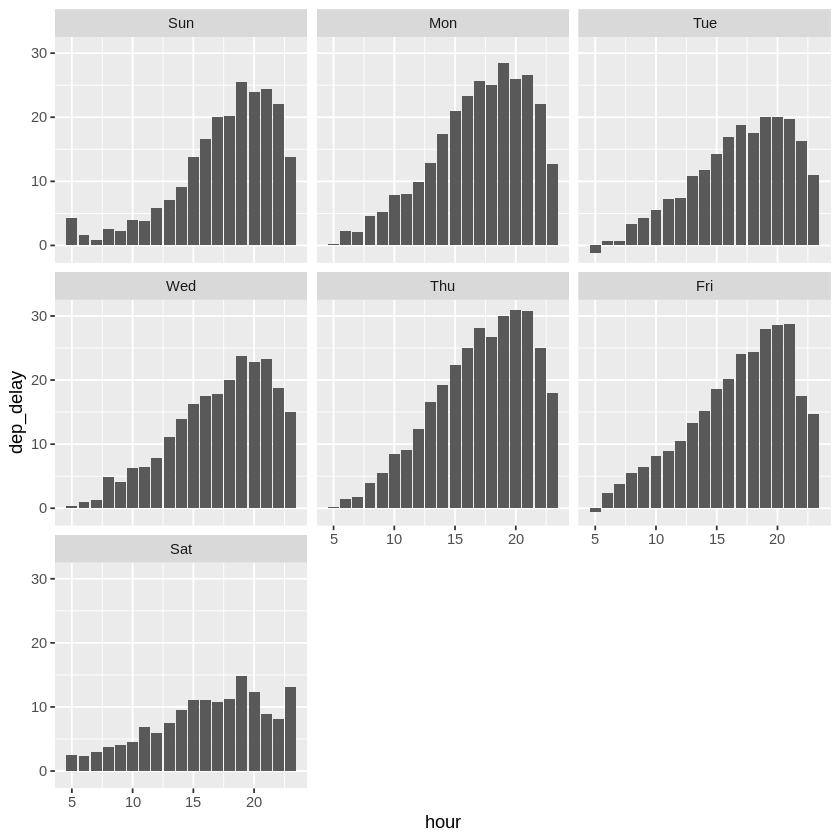

In [ ]:
### YOUR ANSWER SHOULD LOOK LIKE THIS

2.) Convert `arr_time` and `dep_time` to date-time variables. Calculate their difference and
compare the result to air_time. Compare this to taking the difference of `arr_time` and `dep_time`  directly. For simplicity, assume all flights are not overnight flights.

_Hint_ 1: You'll probably need to consider the different time zones between destination and origin. How can we incorporate the airports dataset to account for this?   

_Hint_ 2: Note that `dep_time` and `arr_time` are in HHMM format (e.g 513 is 5 hours and 13 minutes).  

_Hint_ 3:The function  `%/%` is integer division and `%%` returns the remainder from divison so `513 %/% 100` returns 5 and `513 %% 100` returns 13. Use these function with your knowledge of `dep_time` and `arr_time` to construct a date time variable.

_Hint_ 4: This might be helpful: https://stackoverflow.com/questions/49105472/how-to-convert-whole-column-of-dates-times-from-one-time-zone-to-another-in-r

In [ ]:
### YOUR CODE HERE


In [ ]:
### YOUR ANSWER SHOULD LOOK LIKE THIS

flight_duration,air_time,departure_utc,arrival_utc,dep_time,arr_time,origin,dest,origin_tz,dest_tz
<drtn>,<dbl>,<dttm>,<dttm>,<int>,<int>,<chr>,<chr>,<chr>,<chr>
253 mins,3.7833333,2013-01-01 10:17:00,2013-01-01 14:30:00,517,830,EWR,IAH,America/New_York,America/Chicago
257 mins,3.7833333,2013-01-01 10:33:00,2013-01-01 14:50:00,533,850,LGA,IAH,America/New_York,America/Chicago
221 mins,2.6666667,2013-01-01 10:42:00,2013-01-01 14:23:00,542,923,JFK,MIA,America/New_York,America/New_York
138 mins,1.9333333,2013-01-01 10:54:00,2013-01-01 13:12:00,554,812,LGA,ATL,America/New_York,America/New_York
166 mins,2.5000000,2013-01-01 10:54:00,2013-01-01 13:40:00,554,740,EWR,ORD,America/New_York,America/Chicago
198 mins,2.6333333,2013-01-01 10:55:00,2013-01-01 14:13:00,555,913,EWR,FLL,America/New_York,America/New_York
72 mins,0.8833333,2013-01-01 10:57:00,2013-01-01 12:09:00,557,709,LGA,IAD,America/New_York,America/New_York
161 mins,2.3333333,2013-01-01 10:57:00,2013-01-01 13:38:00,557,838,JFK,MCO,America/New_York,America/New_York
175 mins,2.3000000,2013-01-01 10:58:00,2013-01-01 13:53:00,558,753,LGA,ORD,America/New_York,America/Chicago
